In [ ]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 7
elements_per_cm = 10
regions = [
    (2.0, [20.0], np.array([[[0.0]]]), [20.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [0.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]


dpn_prob = jax_pn.DPN.DPN_Problem.from_regions(regions, elements_per_cm, N_max, lagrange, L_scat=0)
pn_prob  = jax_pn.PN.PN_Problem.from_regions(regions, elements_per_cm, N_max, lagrange, L_scat=0)

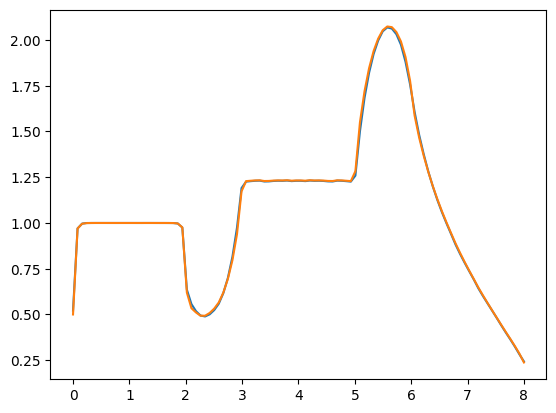

In [ ]:
dpn_prob.Solve_Multigroup_System("vacuum", 1)
pn_prob.Solve_Multigroup_System("vacuum", 1)
xplot = np.linspace(0, 8, 100)
aflux_PN  = pn_prob.interpolate_solution(xplot, k= 0, energy_group = 0)
aflux_DPN = 0.5 * (dpn_prob.interpolate_solution(xplot, k= 0, mu_sign = -1, energy_group = 0) + dpn_prob.interpolate_solution(np.linspace(0,8, 100), k= 0, mu_sign = 1, energy_group = 0))
plt.plot(xplot, aflux_PN, label= "DPN")
plt.plot(xplot, aflux_DPN, label= "DPN")

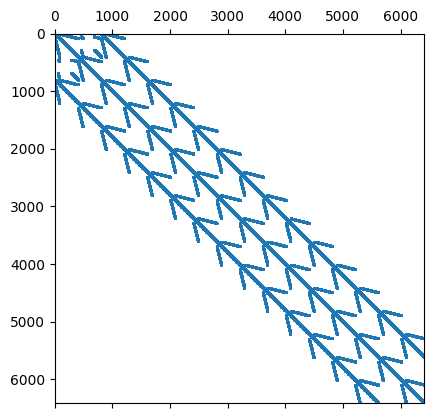

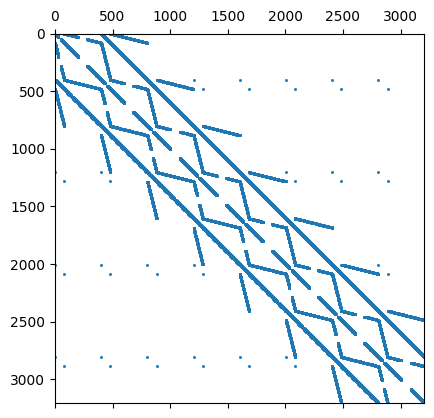

In [33]:
plt.spy(dpn_prob.assemble_multigroup_system("vacuum",1)[0], markersize= 1, label= "DPN System")
plt.figure()
plt.spy(pn_prob.assemble_multigroup_system("vacuum",1)[0], markersize= 1, label= "PN System")